In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [5]:
fields = ['country', 'points','price', 'variety']
wineRevs = pd.read_csv('wine_reviews.csv',
                       usecols = fields)
wineRevs.head()

,country,points,price,variety
0,Italy,87,NaN,White Blend
1,Portugal,87,15.0,Portuguese Red
2,US,87,14.0,Pinot Gris
3,US,87,13.0,Riesling
4,US,87,65.0,Pinot Noir


> ### **Graficando con matplot lib**

[Text(0.5, 0, 'price'), Text(0, 0.5, 'points')]

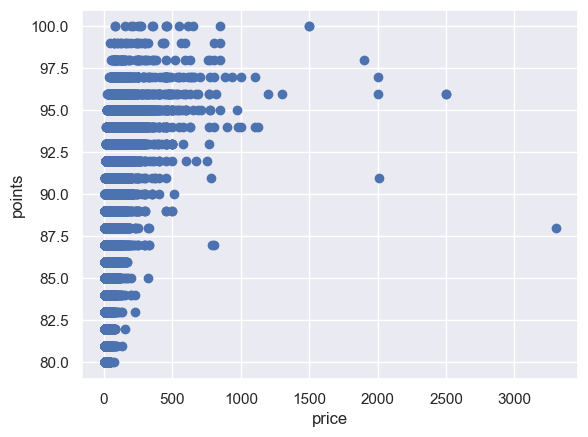

In [6]:
x = wineRevs.price.values
y = wineRevs.points.values

fig = plt.figure()
ax = plt.axes()

ax.scatter(x, y)
ax.set(xlabel='price', ylabel='points')

> ## **Graficando con Seaborn**

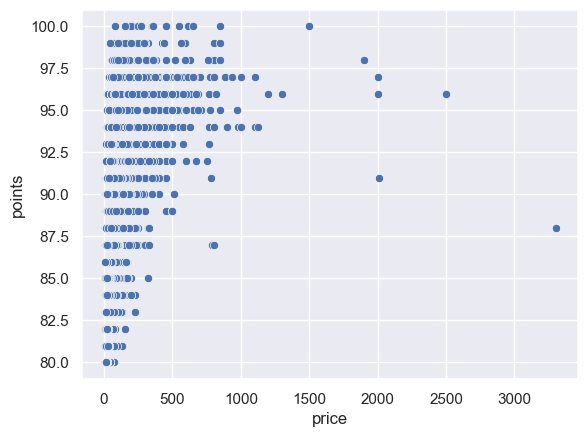

In [7]:
ax = sns.scatterplot(x='price', y='points', data=wineRevs)

> ### **Scatter Plots With Labels**

In [8]:
countries = ['Argentina', 'Chile', 'Spain']
filteredWineRevs = wineRevs[wineRevs['country'].isin(countries)]
filteredWineRevs.head()

,country,points,price,variety
5,Spain,87,15.0,Tempranillo-Merlot
16,Argentina,87,30.0,Malbec
17,Argentina,87,13.0,Malbec
18,Spain,87,28.0,Tempranillo Blend
36,Chile,86,15.0,Viognier-Chardonnay


**Ejercicio:** Siguiendo lo realizado en el notebook anterior, realice un gráfico scatter plot de precio vs puntaje en el cual diferencie por color el pais de origen de cada vino (Argentina, España o Chile).

[Text(0.5, 0, 'price'), Text(0, 0.5, 'points')]

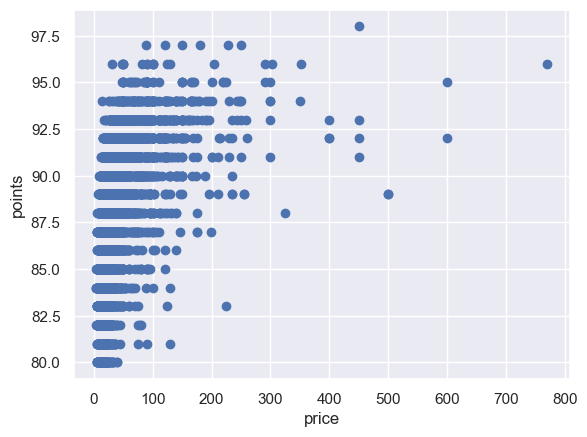

In [10]:
x = filteredWineRevs.price.values
y = filteredWineRevs.points.values

fig = plt.figure()
ax = plt.axes()

ax.plot()
ax.scatter(x, y)
ax.set(xlabel='price', ylabel='points')

> **Same graphic but with seaborn**

In [12]:
filteredWineRevs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14917 entries, 5 to 129957
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  14917 non-null  object 
 1   points   14917 non-null  int64  
 2   price    14745 non-null  float64
 3   variety  14916 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 582.7+ KB


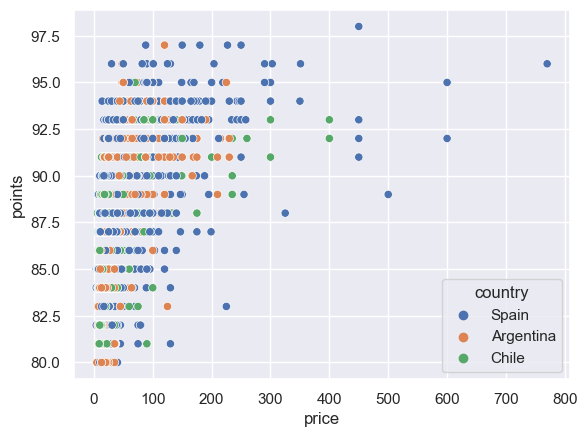

In [14]:
ax = sns.scatterplot( x='price', y='points', hue='country', data=filteredWineRevs)

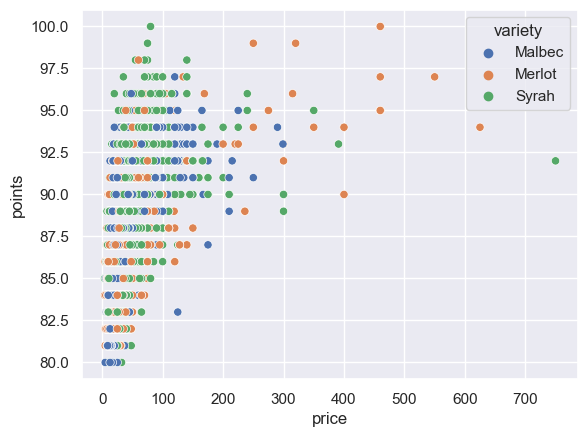

In [15]:
wineType = ['Merlot', 'Malbec', 'Syrah']

filteredWineRevs = wineRevs[wineRevs['variety'].isin(wineType)]

ax = sns.scatterplot(x='price', y='points', hue='variety', data=filteredWineRevs)

> ## **Categorical Plots**

In [17]:
irisData = pd.read_csv('iris_dataset.csv')
irisData.drop(columns=['fila'], inplace=True)
irisData.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


> ## **Basic Categorical Plot**
> 
> This is a basic categorical plot. It shows how to plot a categorical variable.
> 
> Is often used in data science and because of that Seaborn offers
> dedicted method: `catplot`.

First, lets draw a graphic with matplotlib

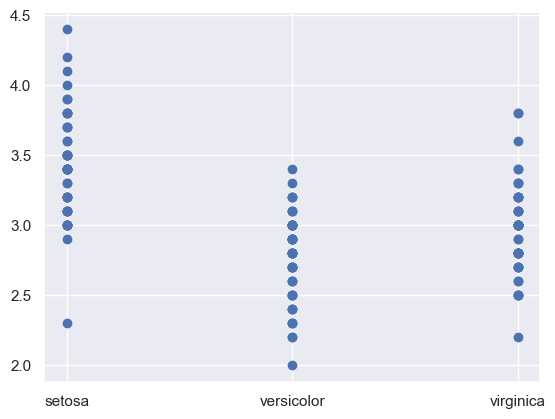

In [20]:
spec = irisData['species']
petalW = irisData['sepal_width']

fig = plt.figure()
ax = plt.axes()
ax.scatter(spec, petalW)

> The output is not very clear because of the overlap between the dots.

Now with Seaborn.

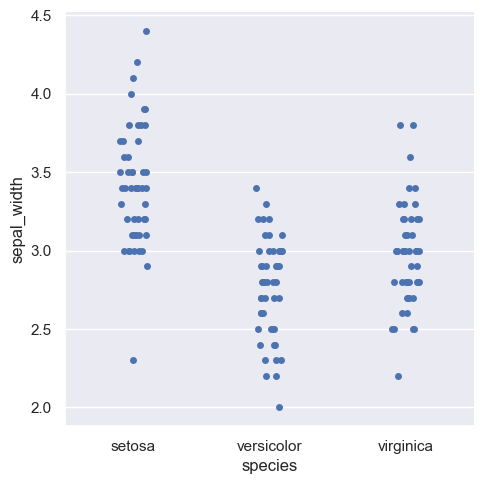

In [21]:
sns.catplot(data = irisData, x='species', y= 'sepal_width', ci= 'sd', estimator=np.median) # type: ignore

> **Ejercicos**:
> 
> 1. Realizar con Seaborn un gráfico del ancho del petalo según la especie
> 2. Realizar el mismo gráfico, pero ahora como gráfico de barras.
>> **Pista**: ver el parametro `kind`
> 3. ¿Que representan las barritas negras?
> 4. Averiguar la utilidad de los parámetros `ci` y `estimator`.

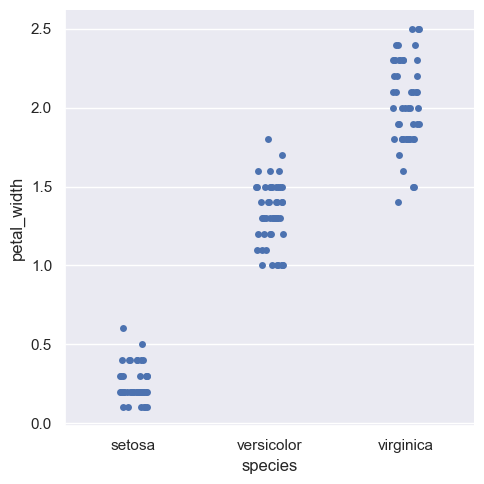

In [24]:
#1
sns.catplot(
    data=irisData,
    x = 'species',
    y = 'petal_width',
    ci = 'sd',
    estimator = np.median)

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_10688\86859043.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.catplot(


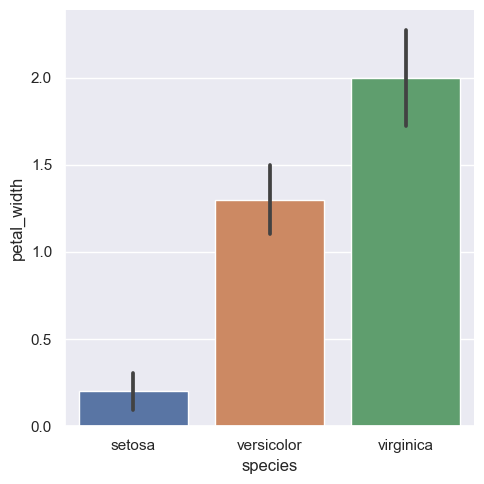

In [26]:
#2
sns.catplot(
    data=irisData,
    x = 'species',
    y = 'petal_width',
    ci = 'sd',
    estimator = np.median,
    kind = 'bar')

> ### **Boxplot**

In [29]:
varieties = ['Malbec', 'Red Blend', 'Cabernet Sauvignon']
wines = filteredWineRevs[filteredWineRevs['variety'].isin(varieties)].dropna()
wines.head()

,country,points,price,variety
16,Argentina,87,30.0,Malbec
17,Argentina,87,13.0,Malbec
59,US,86,55.0,Malbec
160,France,91,35.0,Malbec
224,Argentina,90,22.0,Malbec
